### Import Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [66]:
train_df = pd.read_csv('train.csv', index_col='id')
test_df = pd.read_csv('test.csv', index_col='id')


In [67]:
train_df

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...
90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6


In [68]:
# Make different lists for numeric, categorical, and target variables
numeric = list(train_df._get_numeric_data())
categ = list(train_df.drop(numeric, axis = 1))
target='Rings'
numeric.remove(target)

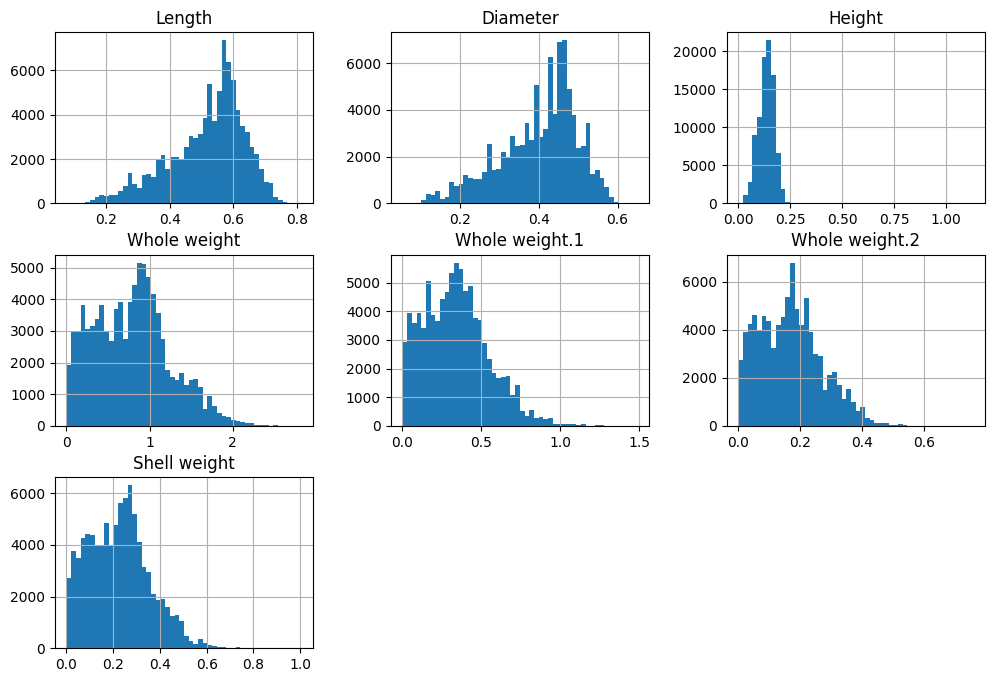

In [69]:
# Check the distribution for each column
train_df[numeric].hist(bins=50, figsize=(12,8))
plt.show()

In [70]:
#no null columns
train_df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [71]:
#only one object column which is sex can be converted to numerical
train_df.dtypes 

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
dtype: object

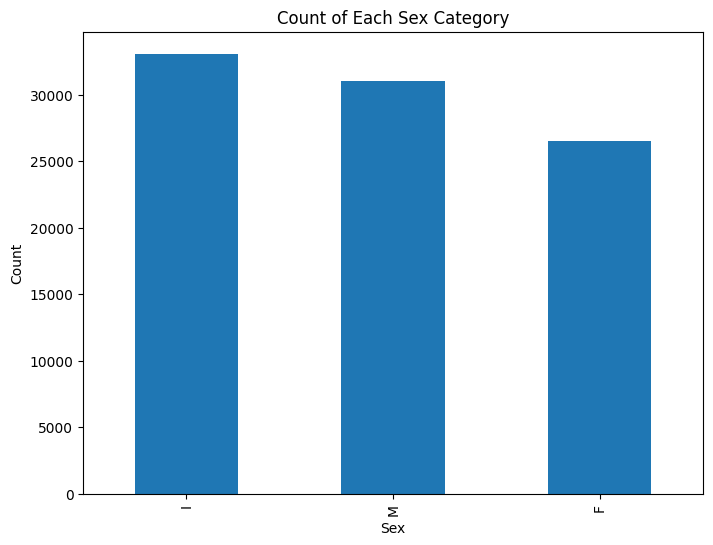

In [72]:
# three categories
sex_counts = train_df['Sex'].value_counts() 

plt.figure(figsize=(8, 6))
sex_counts.plot(kind='bar')
plt.title('Count of Each Sex Category')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

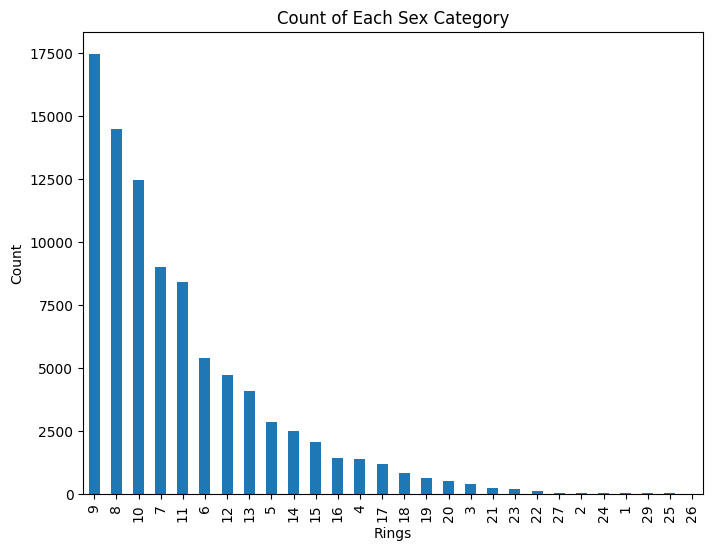

In [73]:
#Distribution of the target variable
ring_counts = train_df['Rings'].value_counts(ascending=False) 

plt.figure(figsize=(8, 6))
ring_counts.plot(kind='bar')
plt.title('Count of Each Sex Category')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.show()

In [74]:
#Convert the categorical variables into numerical
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])

train_df_numeric = train_df

In [75]:
train_df_numeric

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...
90610,2,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,2,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,1,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6


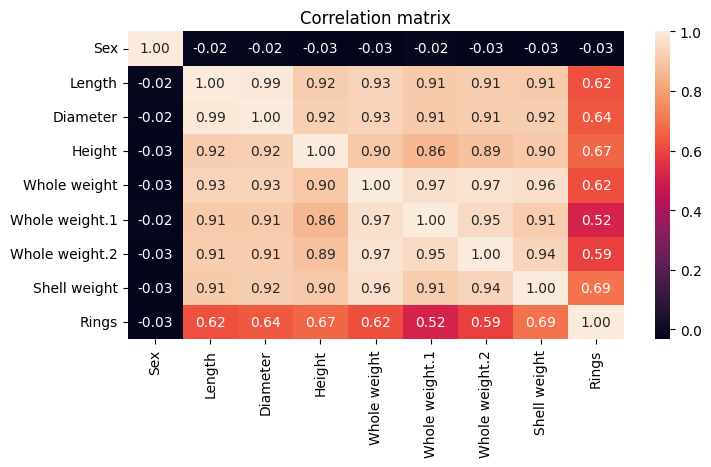

In [113]:
corr = train_df_numeric.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, fmt="0.2f")
plt.title("Correlation matrix")
plt.show()

In [76]:
#CHecking if the sex column is important, and its distribution
grouped_means = train_df_numeric.groupby('Sex')['Rings'].mean()

print(grouped_means)

Sex
0    11.161389
1     7.533557
2    10.753408
Name: Rings, dtype: float64


In [77]:
train_df_numeric.describe()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,1.050014,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.795174,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,2.000000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


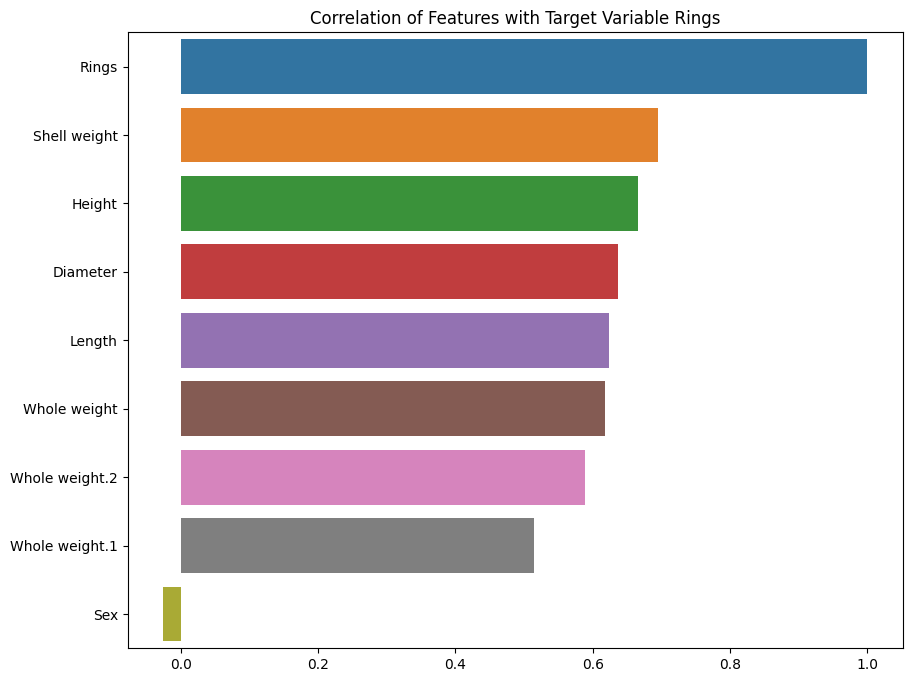

In [78]:
#how correlated every numeric feature is with the target variable(sex has the least relation with the target variable)
correlation = train_df_numeric.corrwith(train_df_numeric['Rings']).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation.values, y=correlation.index)
plt.title('Correlation of Features with Target Variable Rings')
plt.show()

In [ ]:
y = train_df_numeric['Rings']
X = train_df_numeric.drop('Rings', axis=1)

plt.figure(figsize=(15, 10))

for i, column in enumerate(X):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=X[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [79]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        percentile25 = df[column].quantile(0.25)
        percentile75 = df[column].quantile(0.75)
        iqr = percentile75 - percentile25
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr
        
        df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    
    return df

columns_to_check = ['Length','Diameter','Height','Whole weight','Whole weight.1','Whole weight.2', 'Shell weight']  # Specify your columns here
new_df = remove_outliers_iqr(train_df_numeric, columns_to_check)

print(f"Original size: {train_df_numeric.shape}, After outlier removal: {new_df.shape}")

Original size: (90615, 9), After outlier removal: (86766, 9)


In [80]:
new_df 

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
5,0,0.610,0.480,0.170,1.2010,0.5335,0.3135,0.3085,10
...,...,...,...,...,...,...,...,...,...
90610,2,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,2,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,1,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6


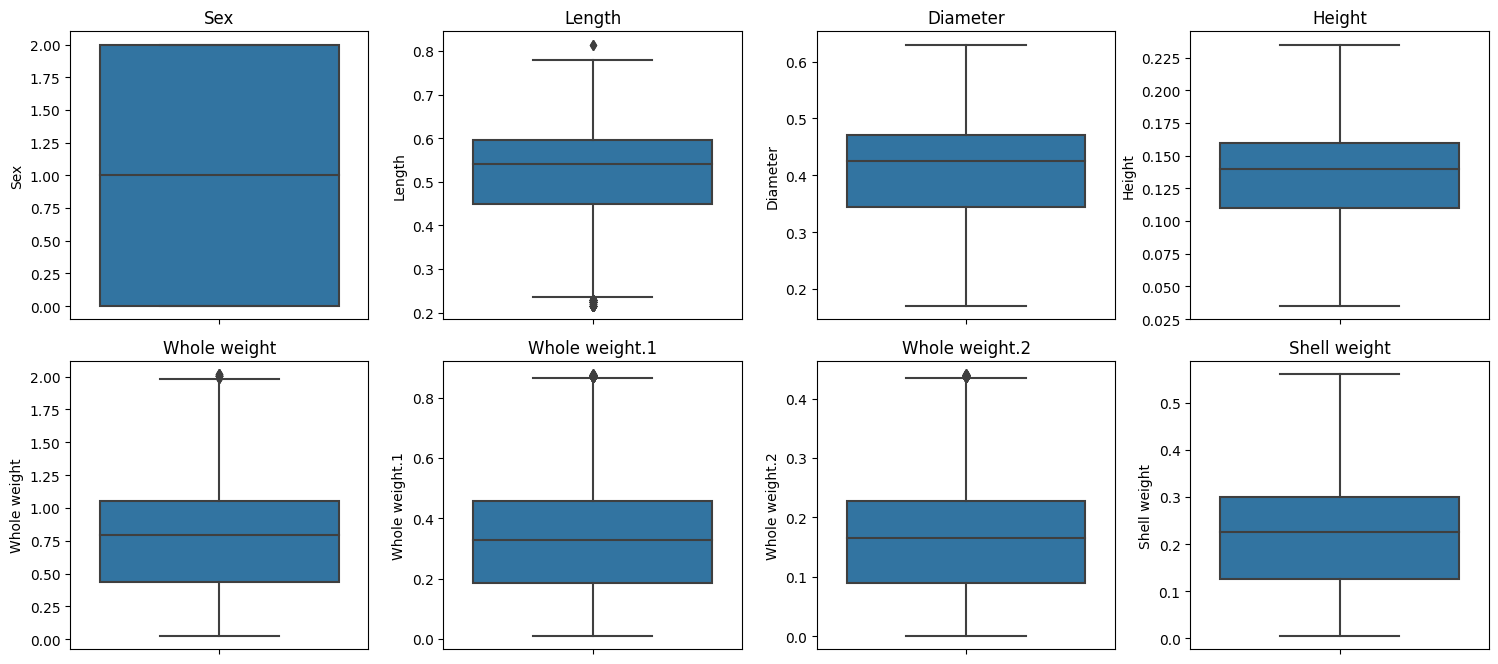

In [81]:
y = new_df['Rings']
X = new_df.drop('Rings', axis=1)

plt.figure(figsize=(15, 10))

for i, column in enumerate(X):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=X[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [82]:
# # List of columns to transform
# #columns_to_check = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M']
# olumns_to_check = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']

# # Additional columns to include without transformation
# additional_columns = ['Rings']

# # Apply log transformation for specified columns
# log_transformed_df = pd.DataFrame()
# for column in columns_to_check:
#     log_transformed_df[column + '_log'] = np.log1p(train_df_numeric[column])

# # Include additional columns from the original DataFrame
# log_transformed_df[additional_columns] = train_df_numeric[additional_columns]

# # Verify the resulting DataFrame
# log_transformed_df.head()


In [83]:
# List of columns to transform
#columns_to_check = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M']
columns_to_check = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']

# Additional columns to include without transformation
additional_columns = ['Sex','Rings']

# Apply log transformation for specified columns
log_transformed_df = pd.DataFrame()
for column in columns_to_check:
    log_transformed_df[column + '_log'] = np.log1p(train_df_numeric[column])

# Include additional columns from the original DataFrame
log_transformed_df[additional_columns] = train_df_numeric[additional_columns]

# Verify the resulting DataFrame
log_transformed_df.head()


,Length_log,Diameter_log,Height_log,Whole weight_log,Whole weight.1_log,Whole weight.2_log,Shell weight_log,Sex,Rings
id,,,,,,,,,
0,0.438255,0.357674,0.139762,0.571827,0.284050,0.136714,0.215111,0,11
1,0.488580,0.398776,0.135405,0.756122,0.377066,0.244122,0.277632,0,11
2,0.148420,0.104360,0.024693,0.020783,0.005485,0.002996,0.004988,1,6
3,0.466874,0.388658,0.139762,0.649456,0.318817,0.186894,0.223144,2,10
4,0.441476,0.354172,0.122218,0.577736,0.314446,0.148420,0.180236,1,9


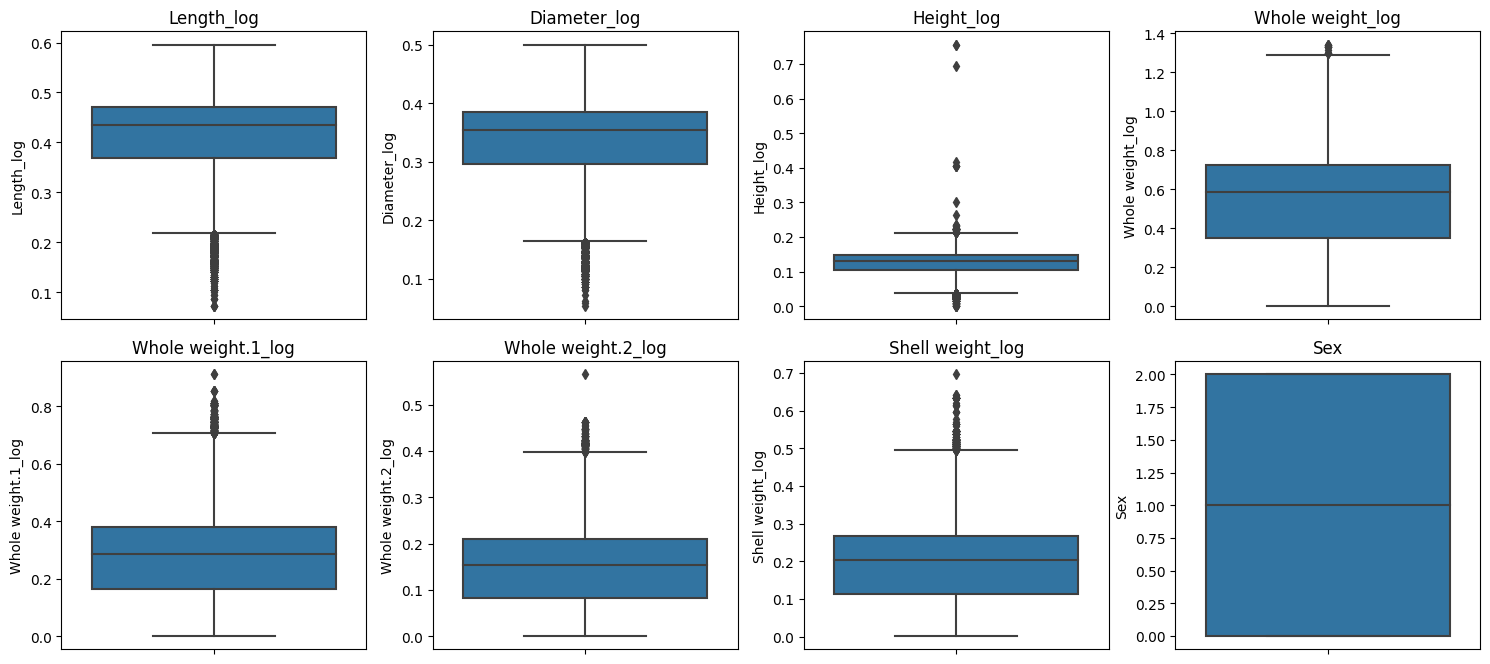

In [84]:
y = log_transformed_df['Rings']
X = log_transformed_df.drop('Rings', axis=1)

plt.figure(figsize=(15, 10))

for i, column in enumerate(X):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=X[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [85]:
# # # List of columns to transform
# # #columns_to_check = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Sex_F', 'Sex_I', 'Sex_M']
# # olumns_to_check = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']
# 
# # # Additional columns to include without transformation
# # additional_columns = ['Rings']
# 
# # # Apply log transformation for specified columns
# # log_transformed_df = pd.DataFrame()
# # for column in columns_to_check:
# #     log_transformed_df[column + '_log'] = np.log1p(train_df_numeric[column])
# 
# # # Include additional columns from the original DataFrame
# # log_transformed_df[additional_columns] = train_df_numeric[additional_columns]
# 
# # # Verify the resulting DataFrame
# # log_transformed_df.head()
# 


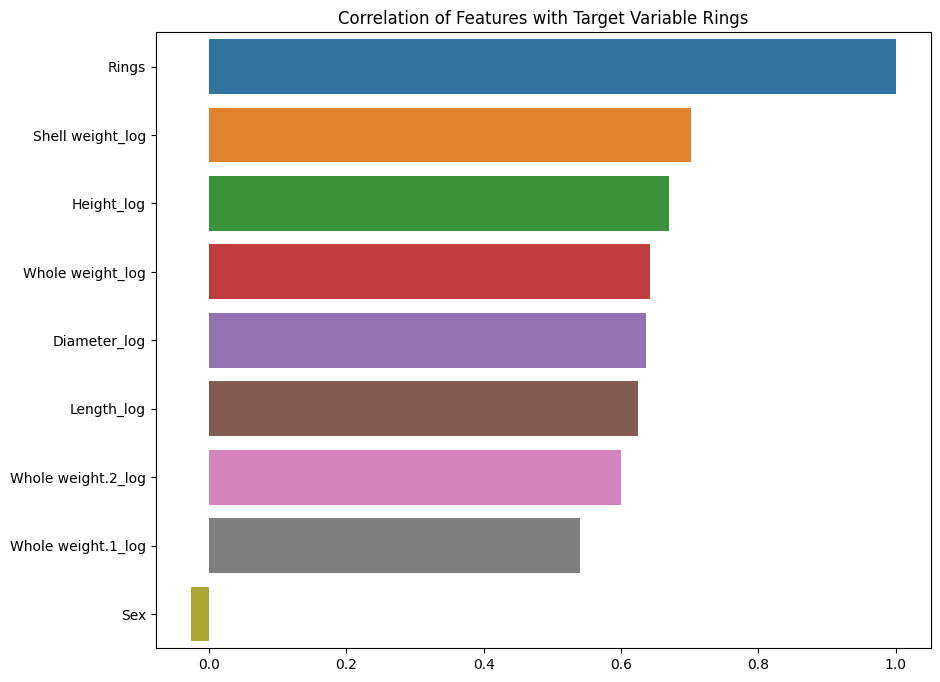

In [87]:
correlation = log_transformed_df.corrwith(log_transformed_df['Rings']).sort_values(ascending=False)
#correlation = new_df.corrwith(new_df['Rings']).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation.values, y=correlation.index)
plt.title('Correlation of Features with Target Variable Rings')
plt.show()

### Linear Regression

In [88]:
from sklearn.preprocessing import MinMaxScaler
# X = log_transformed_df.drop('Rings', axis=1)
# y = log_transformed_df['Rings']


X = new_df.drop('Rings', axis=1)
y = new_df['Rings']

#scaler = MinMaxScaler(feature_range=(-1,1))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

LinearRegression()

In [90]:
y_pred_lin = model_lin.predict(X_val)

In [91]:
def rmsle(y_true, y_pred):
    log_pred = np.log1p(y_pred)
    log_true = np.log1p(y_true)
    
    # Calculate the squared difference
    squared_error = np.square(log_pred - log_true)
    
    # Calculate the mean of squared differences and take the square root
    rmsle = np.sqrt(np.mean(squared_error))
    
    return rmsle

In [92]:
rmsle_score_lin = rmsle(y_val, y_pred_lin)
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle_score_lin}")

Root Mean Squared Logarithmic Error (RMSLE): 0.1639447284177188


### Desicion tree regression

In [93]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [94]:
y_pred_dt = model_dt.predict(X_val)

In [95]:
rmsle_score_dt = rmsle(y_val, y_pred_dt)
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle_score_dt}")

Root Mean Squared Logarithmic Error (RMSLE): 0.21477433287753012


### XGBoost

In [97]:
from sklearn.model_selection import cross_val_score
xgboost_params = {
    'max_depth': 10, 
    'verbosity': 0,
    'random_state':42,
    'booster': 'gbtree',
    'n_estimators': 1137, 
    'tree_method': 'hist',
    'min_child_weight': 7, 
    'grow_policy': 'lossguide', 
    'gamma': 0.03816426816838989, 
    'subsample': 0.486382907668344, 
    'objective': 'reg:squarederror',
    'reg_lambda': 1.7487237399420372, 
    'reg_alpha': 0.013043045359306716,
    'learning_rate': 0.011733966748427322, 
    'colsample_bytree': 0.5748511749872887, 
}
model_xgb = xgb.XGBRegressor(**xgboost_params)

scores = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

In [98]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5748511749872887, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.03816426816838989,
             grow_policy='lossguide', importance_type=None,
             interaction_constraints=None, learning_rate=0.011733966748427322,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1137, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [99]:
# Making predictions
y_pred_xgb = model_xgb.predict(X_val)

rmsle_score_xgb = rmsle(y_val, y_pred_xgb)
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle_score_xgb}")

Root Mean Squared Logarithmic Error (RMSLE): 0.15003121730408325


In [105]:
feature_importances_xgb = model_xgb.feature_importances_

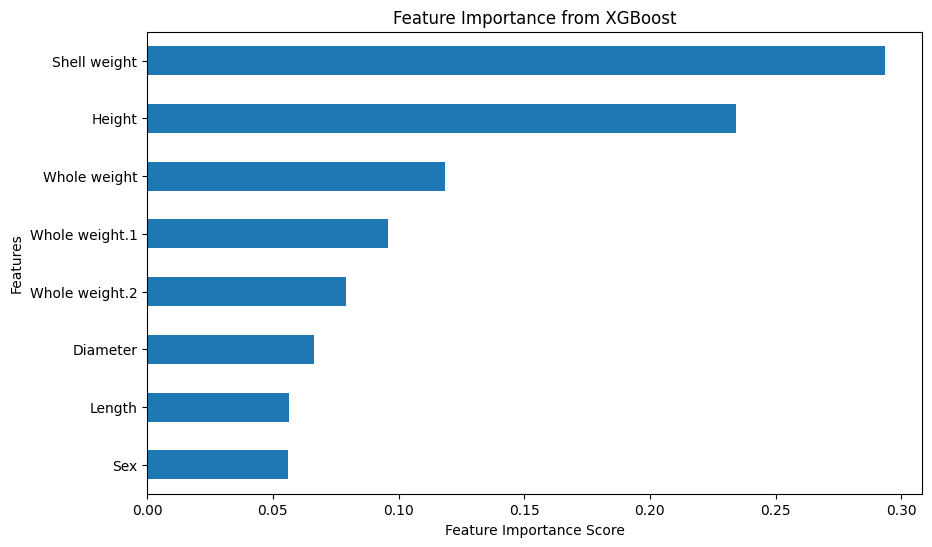

In [106]:
plt.figure(figsize=(10, 6))
feature_importance_series = pd.Series(feature_importances_xgb, index=X.columns)
feature_importance_series.sort_values().plot(kind='barh')
plt.title('Feature Importance from XGBoost')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

### RandomForestRegressor

In [100]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_log_error    

model = SVR(kernel='rbf')
model.fit(X_train, y_train)

y_pred = model.predict(X_val)


rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))

print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle)

Root Mean Squared Logarithmic Error (RMSLE): 0.15815462022127763


### Working with the test data

In [114]:
# Perform label encoding on the test data
le = LabelEncoder()
test_df['Sex'] = le.fit_transform(test_df['Sex'])

In [115]:
test_df

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
id,,,,,,,,
90615,2,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
90616,2,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
90617,2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
90618,2,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
90619,1,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
...,...,...,...,...,...,...,...,...
151021,1,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
151022,0,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
151023,1,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650


In [116]:
y_pred_test = model_xgb.predict(test_df)
y_pred_test_rounded = np.round(y_pred_test).astype(int)

In [117]:
y_pred_test

array([ 9.9229765,  9.726977 ,  9.827501 , ..., 12.438144 , 13.687152 ,
        8.919976 ], dtype=float32)

In [118]:
predictions_df = pd.DataFrame({
    'id': test_df.index,
    'Rings': y_pred_test
})

In [119]:
predictions_df.to_csv('submission5.csv', index=False)